In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Hack pro GPU na Windows
for gpu in tf.config.experimental.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

In [4]:
img_path = 'datasets/08/images/1.jpg'
img = keras.preprocessing.image.load_img(img_path)

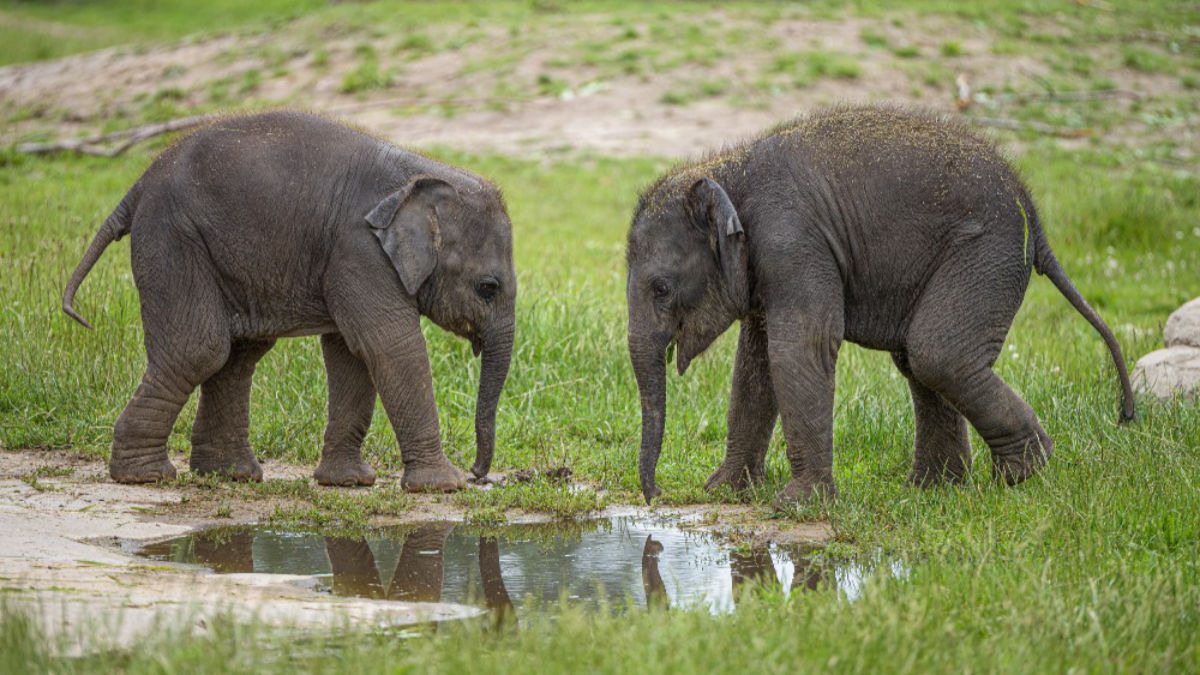

In [5]:
img

In [6]:
img_resized = tf.image.resize_with_pad(np.array(img), 224, 224)

In [7]:
img_resized.shape

TensorShape([224, 224, 3])

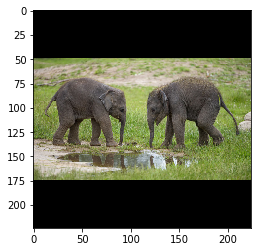

In [8]:
plt.imshow(img_resized.numpy().astype('uint8'), interpolation="nearest")

In [9]:
images = np.array([img_resized])
inputs = keras.applications.resnet50.preprocess_input(images)
y_proba = model.predict(inputs)

In [10]:
top_K = keras.applications.resnet50.decode_predictions(y_proba, top=5)
for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

Image #0
  n02504458 - African_elephant 46.87%
  n02504013 - Indian_elephant 43.38%
  n01871265 - tusker       6.14%
  n02396427 - wild_boar    2.12%
  n02395406 - hog          0.49%

